# Other clustering algorithms
Short presentation using sklearn of clustering algorithms other than Kmeans and HClustering.

## Init the MEC environment

In [1]:
from IPython.core.display import display, HTML
import nbimporter
import sklearn.cluster as cls
import numpy as np
from sklearn.decomposition import PCA

In [6]:
def visualize(matrix, axes, labels=None, p1=None, p2=None):
    if p1 is None: p1 = 0
    if p2 is None: p2 = 1
    pca = PCA(n_components=min([p2+1,matrix.shape[1]]))
    pca.fit(matrix)
    m = pca.transform(matrix)
    if labels is None:
        axes.scatter(m[:,[p1]], m[:,[p2]], alpha=0.4)
    else:
        axes.scatter(m[:,[p1]], m[:,[p2]], alpha=0.4, c=labels)

In [7]:
import sklearn.cluster as cls
import numpy as np

K = 8
experiments = ['K-means', 'Ward HClustering', 'Affinity Propagation', 'Mean-shift',
              'Spectral clustering', 'DBSCAN']
classes = [cls.KMeans(n_clusters=K), 
           cls.AgglomerativeClustering(n_clusters=K, linkage='ward'),
           cls.AffinityPropagation(preference=-50), 
           cls.MeanShift(bin_seeding=True),
           cls.SpectralClustering(n_clusters=K),
           cls.DBSCAN(eps=0.5, min_samples=6)]
model_labels = [None for x in experiments]


## Abstract example

In [8]:
from sklearn.datasets.samples_generator import make_blobs

seeds = [[1, 0], [0, 1], [1, 1], [-1, -1], [-1, 0], [0, -1], [-1, 1], [1, -1]]
R, _ = make_blobs(n_samples=1000, centers=seeds, cluster_std=0.3)
test = R

## Test set-up

In [9]:
for e in ['K-means', 'Ward HClustering']:
    A = classes[experiments.index(e)]
    A.fit(test)
    model_labels[experiments.index(e)] = A.labels_

# Affinity propagation
Brendan J. Frey and Delbert Dueck, “Clustering by Passing Messages Between Data Points”, Science Feb. 2007

In [10]:
af = 'Affinity Propagation'
A = classes[experiments.index(af)]
A.fit(test)
model_labels[experiments.index(af)] = A.labels_

# Mean shift

Dorin Comaniciu and Peter Meer, “Mean Shift: A robust approach toward feature space analysis”. IEEE Transactions on Pattern Analysis and Machine Intelligence. 2002. pp. 603-619.

Given a candidate centroid $x_i$ for iteration $t$, the candidate is updated according to the following equation:

$$x_i^{t+1} = x_i^t + m(x_i^t),$$

where

$$
m(x_i) = \frac{\sum_{x_j \in N(x_i)}K(x_j - x_i)x_j}{\sum_{x_j \in N(x_i)}K(x_j - x_i)},
$$

Where $N(x_i)$ is the neighborhood of samples within a given distance around $x_i$ and $m$ is the mean shift vector that is computed for each centroid that points towards a region of the maximum increase in the density of points.


In [11]:
ms = 'Mean-shift'
A = classes[experiments.index(ms)]
A.fit(test)
model_labels[experiments.index(ms)] = A.labels_

# Spectral clustering
Given the Affinity matrix $A$, we construct the Graph Laplacian $\Lambda_A$ from $A$.

Given a graph $G$ with $n$ vertices, its Laplacian matrix $L_{{n\times n}}$ is defined as:

$$
L = D - A,
$$

where $D$ is the degree matrix.
The degree of a graph vertex $v$ of a graph $G$ is the number of graph edges which touch $v$.

Then, we compute the first $k$ eigenvectors $v_1, \dots, v_k$ of $L$. Eigenvectors are arranged in a matrix $V_{n \times k}$. Execute Kmeans on $V$ for clustering.

In [12]:
sc = 'Spectral clustering'
A = classes[experiments.index(sc)]
A.fit(test)
model_labels[experiments.index(sc)] = A.labels_

# DBSCAN
The DBSCAN algorithm views clusters as areas of high density separated by areas of low density.

A point $p$ is a **core point** if at least $m$ points are within distance $\epsilon$ from it. Those points are said to be directly reachable from $p$.

A point $q$ is reachable from $p$ if there is a path $p_1, ..., p_n$ with $p_1 = p$ and $p_n = q$, where each $p_{i+1}$ is directly reachable from $p_i$.

For each point $p$, we:
- we create the region of points within distance $\epsilon$ from $p$
- if the size of the region is less than $m$ ($p$ is not a core point) $p$ is discarded
- else, we create a cluster $C$ for $p$ and we examine all the points $p'$ in its region
- we take the region of $p'$ and if it is larger than $m$ we merge it with the region of $p$
- we add $p'$ to $C$ if $p'$ is not in a cluster yet

In [13]:
ds = 'DBSCAN'
A = classes[experiments.index(ds)]
A.fit(test)
model_labels[experiments.index(ds)] = A.labels_

# Visualization

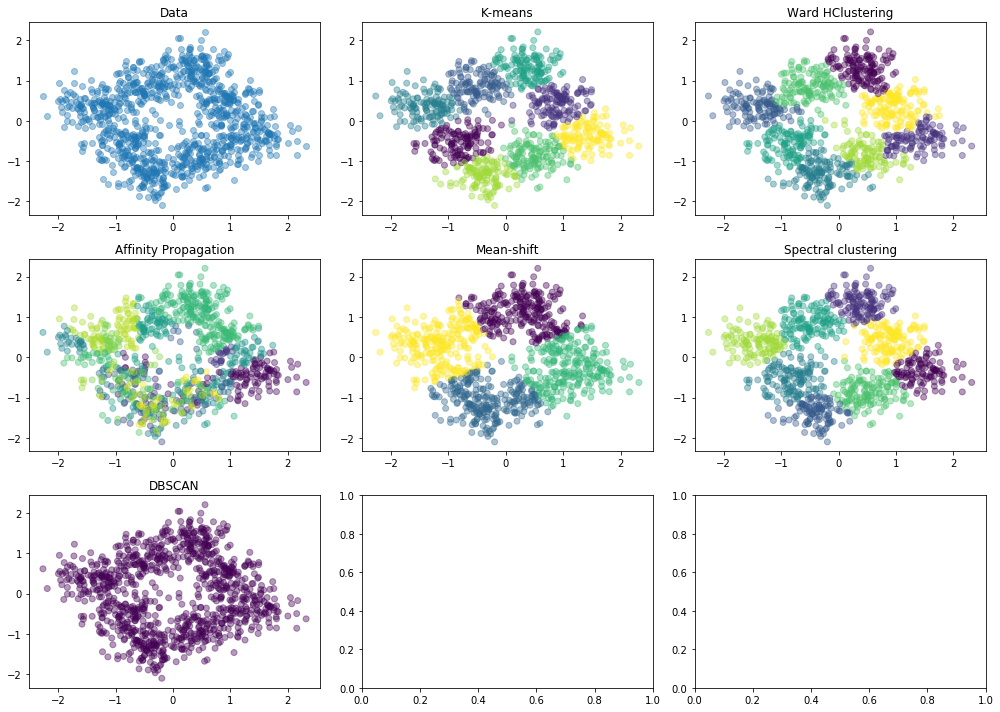

In [16]:
from matplotlib import pyplot as plt

titles = ['Data'] + experiments
models = [None] + model_labels
cols = 3
d1, d2 = 0, 1
rows = int(np.ceil(float(len(models))/cols))
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(14, 10))
for i, labels in enumerate(models):
    visualize(test, axes[i/cols,i%cols], labels=labels, p1=d1, p2=d2)
    axes[i/cols,i%cols].set_title(titles[i])
plt.tight_layout()
plt.show()

